In [88]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Suppress the specific DataConversionWarning
warnings.filterwarnings("ignore")
#Load Files
df = pd.read_csv('mushroom.csv')

In [62]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [63]:
df.isnull().sum()
df[df.duplicated()]
df.drop_duplicates(keep = 'first')
df.isnull().sum()


Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [64]:
num_col = [i for i in df.columns if df[i].dtypes!='O']
num_col


['Unnamed: 0', 'stalk_height', 'cap_diameter']

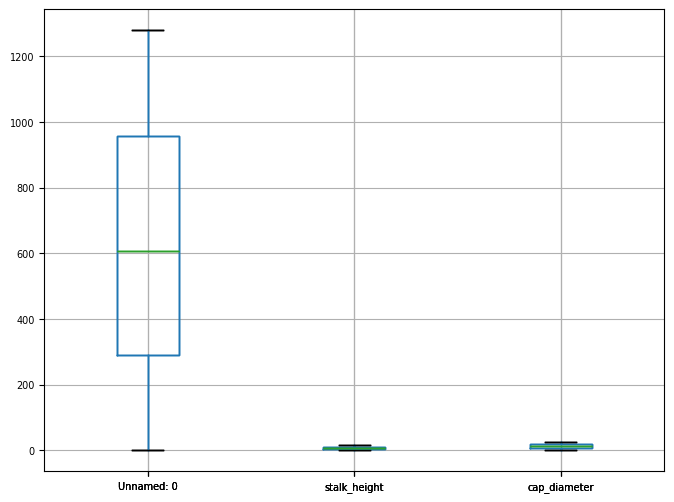

In [65]:
for i in num_col:
    df.boxplot(column = num_col, fontsize = 7)

plt.show()

In [66]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Unnamed: 0      667.250000
stalk_height      6.490263
cap_diameter     12.975085
dtype: float64

In [67]:
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
df_cleaned = df[~((df < LB) | (df > UB)).any(axis=1)]
df_cleaned

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [68]:
df_cleaned.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


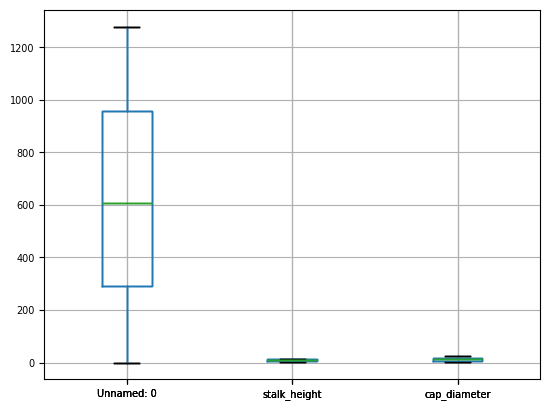

In [69]:
for i in num_col:
    df_cleaned.boxplot(column = num_col, fontsize = 7)

plt.show()

In [70]:
num_col = [i for i in df_cleaned.columns if df_cleaned[i].dtypes!='O']
num_col

['Unnamed: 0', 'stalk_height', 'cap_diameter']

In [71]:
df_cleaned[num_col].corr()

,Unnamed: 0,stalk_height,cap_diameter
Unnamed: 0,1.000000,-0.001508,0.051881
stalk_height,-0.001508,1.000000,-0.003486
cap_diameter,0.051881,-0.003486,1.000000


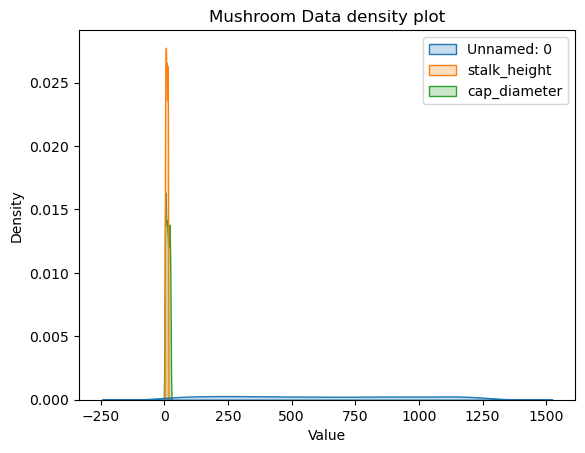

In [72]:
sns.kdeplot( df_cleaned, shade=True, color='skyblue')
plt.title('Mushroom Data density plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [73]:
Q1_test = df_cleaned.quantile(0.25)
Q3_test = df_cleaned.quantile(0.75)
IQR_test = Q3_test - Q1_test
LB_test = Q1_test - 1.5*IQR_test
UB_test = Q3_test + 1.5*IQR_test
test_data = df_cleaned[~((df_cleaned < LB) | (df_cleaned > UB)).any(axis=1)]
test_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [74]:
# Drop irrelevant index column
test_data.drop(columns=['Unnamed: 0'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in test_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    label_encoders[col] = le

# Display first few rows after encoding
test_data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [75]:
# Separate features and target variable
feature = test_data.drop(columns=['class'])
target = test_data['class']

# Select top k features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=15)  # Selecting top 15 features
X_selected = selector.fit_transform(feature, target)

# Get selected feature names
selected_features = feature.columns[selector.get_support()]
selected_features

Index(['cap_surface', 'cap_color', 'odor', 'gill_attachment', 'gill_spacing',
       'gill_size', 'gill_color', 'stalk_shape', 'stalk_root',
       'stalk_surface_above_ring', 'stalk_color_above_ring', 'ring_number',
       'population', 'habitat', 'cap_diameter'],
      dtype='object')

In [76]:
# Getting the number of rows and columns
rows, columns = test_data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 2000, Columns: 25


In [77]:
from sklearn.feature_selection import VarianceThreshold
# Initialize VarianceThreshold to remove constant features (threshold=0)
selector = VarianceThreshold(threshold=0)
selector.fit(test_data)

# Identify columns with non-zero variance
non_constant_columns = test_data.columns[selector.get_support()]
print("Columns with non-zero variance:", list(non_constant_columns))

# Any column not in non_constant_columns is constant (irrelevant)
irrelevant_columns = [col for col in test_data.columns if col not in non_constant_columns]
print("Irrelevant columns (constant):", irrelevant_columns)

Columns with non-zero variance: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class', 'stalk_height', 'cap_diameter']
Irrelevant columns (constant): []


In [78]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

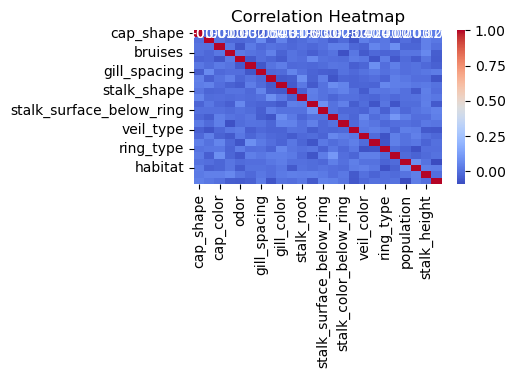

In [79]:
# Compute correlation matrix
correlation_matrix = feature.corr()
# Plot correlation heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [80]:
# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (1600, 24)
Testing Features (X_test): (400, 24)
Training Target (y_train): (1600,)
Testing Target (y_test): (400,)


In [81]:
scaler = StandardScaler()
feature = scaler.fit_transform(feature)
feature

array([[ 1.35664266,  0.39842442,  1.19496641, ...,  0.97916574,
         1.57645935, -1.03012304],
       [ 1.35664266, -1.39628018,  0.81416131, ...,  0.97916574,
        -1.21646308,  0.95840718],
       [ 0.66003539, -0.49892788,  0.43335621, ...,  0.97916574,
         0.16371736, -0.72490441],
       ...,
       [-0.03657188, -0.49892788, -0.328254  , ...,  1.4865055 ,
         1.38218107, -0.14819255],
       [-1.42978643,  1.29577672,  1.19496641, ...,  1.4865055 ,
         0.71519905, -0.55216407],
       [-0.03657188,  0.39842442,  1.57577151, ...,  0.47182598,
         1.24916951,  1.24055562]])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
# Display the shapes of the splits
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (1600, 24)
Testing Features (X_test): (400, 24)
Training Target (y_train): (1600,)
Testing Target (y_test): (400,)


In [83]:
svc = SVC(C=1.0, kernel='linear', gamma=0.2) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.6675

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [91]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
# Define the model
svm_model = SVC()

# Define the grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model on your training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.8512500000000001
